In [11]:
import pandas as pd
import shutil
import os


## Conver the SMILES into XYZ files using OpenBable

first install openbable in a conda environment:

```
conda install -c conda-forge openbabel
```



In [6]:
smiles_df = pd.read_csv('residues_smiles.csv')
capped_smiles_df = smiles_df['Capped_SMILES']
capped_smiles_df

0                    CC(=O)N(c1c(cccc1)F)CC(=O)N(C)C
1               CC(=O)N([C@H](C)C1CCCCC1)CC(=O)N(C)C
2                 CC(=O)N(CCc1ccc(Cl)cc1)CC(=O)N(C)C
3              CC(=O)N([C@@H](C)C1CCCCC1)CC(=O)N(C)C
4             CC(=O)N(CCc1ccc(OC)c(OC)c1)CC(=O)N(C)C
5    CC(=O)N([C@H]1[C@H](OCc2ccccc2)CCC1)CC(=O)N(C)C
Name: Capped_SMILES, dtype: object

In [15]:
residues_xyz_path = './residues_xyz/'
if not os.path.exists(residues_xyz_path):
    os.makedirs(residues_xyz_path, exist_ok=True)


for i, r in capped_smiles_df.items():
    residue_name = i
    smiles = r
    command = f'obabel -:"{smiles}" -O {residues_xyz_path}{residue_name}.xyz --gen3d'
    print(command)
    os.system(command)

    



obabel -:"CC(=O)N(c1c(cccc1)F)CC(=O)N(C)C" -O ./residues_xyz/0.xyz --gen3d
obabel -:"CC(=O)N([C@H](C)C1CCCCC1)CC(=O)N(C)C" -O ./residues_xyz/1.xyz --gen3d


1 molecule converted
1 molecule converted


obabel -:"CC(=O)N(CCc1ccc(Cl)cc1)CC(=O)N(C)C" -O ./residues_xyz/2.xyz --gen3d
obabel -:"CC(=O)N([C@@H](C)C1CCCCC1)CC(=O)N(C)C" -O ./residues_xyz/3.xyz --gen3d


1 molecule converted
1 molecule converted


obabel -:"CC(=O)N(CCc1ccc(OC)c(OC)c1)CC(=O)N(C)C" -O ./residues_xyz/4.xyz --gen3d
obabel -:"CC(=O)N([C@H]1[C@H](OCc2ccccc2)CCC1)CC(=O)N(C)C" -O ./residues_xyz/5.xyz --gen3d


1 molecule converted
1 molecule converted


Displaying: Residue 0


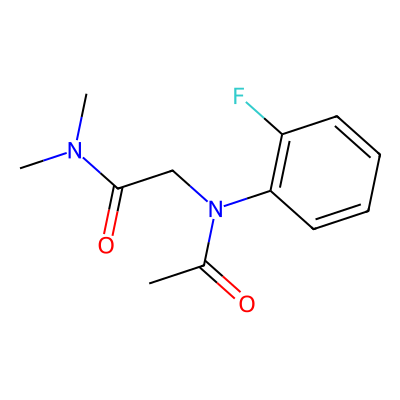

Displaying: Residue 1


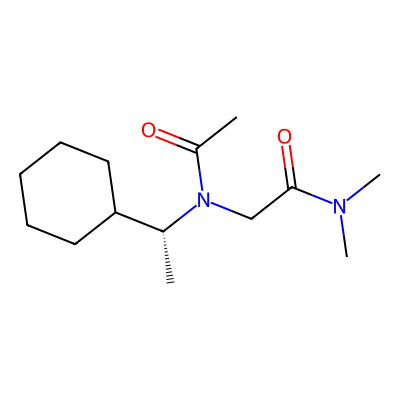

Displaying: Residue 2


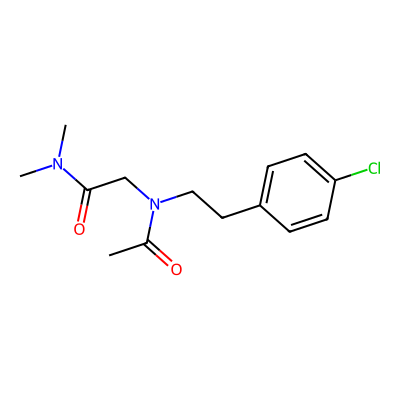

Displaying: Residue 3


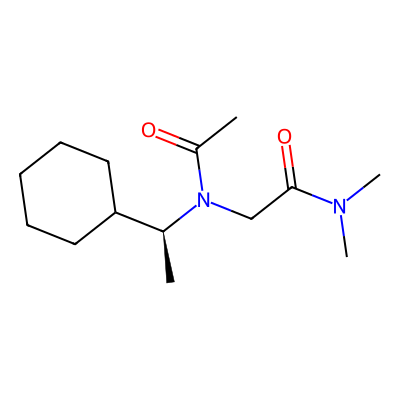

Displaying: Residue 4


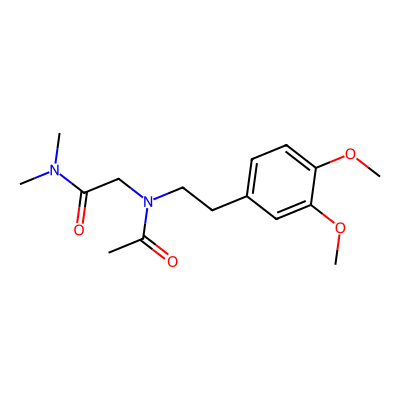

Displaying: Residue 5


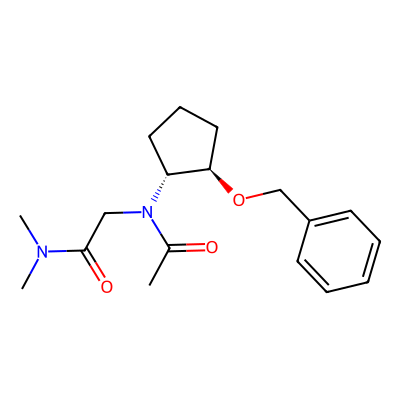

In [23]:
from rdkit import Chem
from rdkit.Chem import Draw

mols = [Chem.MolFromSmiles(smi) for smi in capped_smiles_df.tolist()]
labels = [f"Residue {i}" for i in capped_smiles_df.index]

for i, mol in enumerate(mols):
    print(f"Displaying: {labels[i]}")
    # Create the individual image
    img = Draw.MolToImage(mol, size=(400, 400))
    # Use display() to ensure it shows up in the loop
    display(img)